In [1]:
#importando as bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import warnings

#serão ignoradas todas mensagens de warning (aviso) que aparecer no notebook
warnings.filterwarnings('ignore')

## Abrindo o arquivo com os dados

In [2]:
arquivo_xls = pd.ExcelFile('data/teste_smarkio_Lbs.xls')
dados_analise_ml = pd.read_excel(arquivo_xls, 'Análise_ML')
dados_nlp = pd.read_excel(arquivo_xls, 'NLP')

In [3]:
#esses dados serão utilizados para resolver as atividades de 1 a 4.
dados_analise_ml.head(5)

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


In [4]:
#esses dados serão utilizados para resolver a atividade 5.
dados_nlp.head(5)

,letra,artista
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé
1,Your challengers are a young group from Housto...,Beyoncé
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé
3,If I ain't got nothing I got you If I ain't go...,Beyoncé
4,Six inch heels She walked in the club like nob...,Beyoncé


## Atividades

### 1- Análise exploratória dos dados utilizando estatística descritiva e inferencial,considerando uma, duas e/ou mais variáveis.

In [5]:
#pred_class = classe que foi identificada pelo modelo
#probabilidade = a probabilidade da classe que o modelo identificou
#status = status da classificação de acordo com um especialista
#true_class = classe verdadeira. Se for nula, assumir o valor do pred_class
#se pred_class = true_class, então o modelo acertou a classe

In [6]:
#nós temos um total de 643 dados (também podemos chamar de linhas) e 4 colunas
dados_analise_ml.shape

(643, 4)

In [7]:
#primeiramente iremos analisar os tipos das colunas que temos
#'pred_class', 'probabilidade' e 'true_class' são colunas numéricas
#'status' é do tipo object. Ou seja, se trata de uma coluna categórica
dados_analise_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


In [8]:
dados_analise_ml.describe(include='all') #iremos incluir todas as colunas, até mesmo as categóricas (status)

#a única coluna que possui valores nulos é a 'true_class', elas serão tratadas posteriormente
#a coluna 'status' só possui dois valores possíveis

,Pred_class,probabilidade,status,True_class
count,643.000000,643.000000,643,181.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,approved,NaN
freq,NaN,NaN,600,NaN
mean,52.712286,0.622436,NaN,38.574586
std,37.602068,0.266811,NaN,39.581017
min,2.000000,0.043858,NaN,0.000000
25%,12.000000,0.408017,NaN,0.000000
50%,59.000000,0.616809,NaN,24.000000
75%,81.000000,0.870083,NaN,74.000000


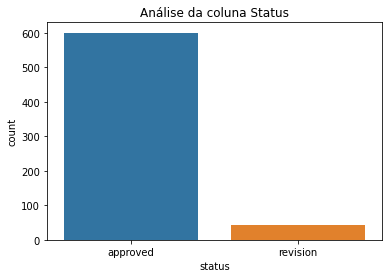

In [9]:
#analisando a coluna 'status'

fig = plt.figure(figsize=(6, 4))
plt.title('Análise da coluna Status')
sns.countplot(dados_analise_ml['status'])
fig.savefig('images/analise_status.png')

#a coluna 'status' possui dois tipos de valores: approved e revision
#approved é o valor que aparece com mais frequência (600), o que representa, aproximadamente, 93% do total
#revision aparece somente 43 vezes
#isso indica que temos mais dados aprovados do que os que precisam de uma revisão

In [10]:
#analisando a coluna 'true_class'
dados_analise_ml_semnull = dados_analise_ml.copy() #armazenando uma cópia do nosso dataframe em outra variável

#iremos fazer uma iteração em cada linha do nosso dataframe
for index, linha in dados_analise_ml_semnull.iterrows():
    
    #verificamos se o valor para 'True_class' é nan (nulo)
    if np.isnan(linha['True_class']):
        
        #se for nulo, iremos armazenar o valor do 'Pred_class' no seu lugar
        dados_analise_ml_semnull.loc[index, 'True_class'] = linha['Pred_class']

In [11]:
#verificando se ainda existe algum valor nulo no dataframe e se a inserção funcionou
dados_analise_ml_semnull.isnull().sum()

Pred_class       0
probabilidade    0
status           0
True_class       0
dtype: int64

In [12]:
#verificando se inserimos os valores certos

#será criado um dataframe temporário para fazermos a comparação
#teremos duas colunas 'True_class': a da esquerda é antes de ser tratada e a direita depois de ser tratada.
#veremos que os valores foram inseridos corretamente
temp_data = pd.concat([dados_analise_ml, dados_analise_ml_semnull['True_class']], axis=1)
temp_data.tail(30)

,Pred_class,probabilidade,status,True_class,True_class
613,24,0.287126,revision,NaN,24.0
614,60,0.511118,revision,NaN,60.0
615,2,0.331168,revision,NaN,2.0
616,3,0.399808,revision,NaN,3.0
617,4,0.405327,revision,NaN,4.0
618,22,0.324137,revision,NaN,22.0
619,24,0.737133,revision,NaN,24.0
620,39,0.812112,revision,NaN,39.0
621,39,0.812112,revision,NaN,39.0
622,43,0.725794,revision,NaN,43.0


In [13]:
#deleta a variável temporária já que não usaremos ela para mais nada
del temp_data

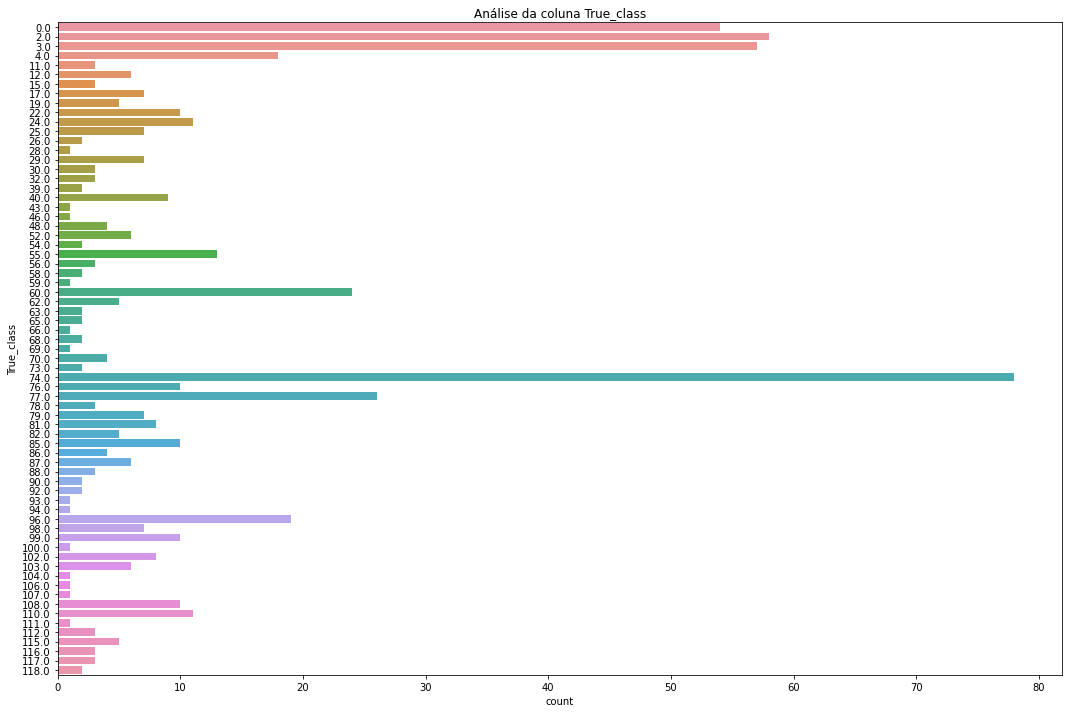

In [14]:
#usaremos só os dados onde o status é 'approved', pois foram confirmados e aprovados pelos cientistas
dados_analise_ml_semnull_approved = dados_analise_ml_semnull[dados_analise_ml_semnull['status'] == 'approved'].copy()

fig = plt.figure(figsize=(18, 12))
plt.title('Análise da coluna True_class')
sns.countplot(y=dados_analise_ml_semnull_approved['True_class'], orient='h')
fig.savefig('images/analise_true_class.png')

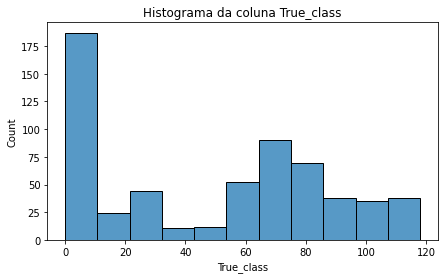

In [15]:
#analisando o histograma da coluna 'True_class'
fig = plt.figure(figsize=(7, 4))
plt.title('Histograma da coluna True_class')
sns.histplot(dados_analise_ml_semnull_approved['True_class'])
fig.savefig('images/histograma_true_class.png')

In [16]:
#temos um total de 69 classes diferentes
dados_analise_ml_semnull_approved['True_class'].nunique()

69

### 2- Calcule o desempenho do modelo de classificação utilizando pelo menos três métricas.

In [17]:
#Por se tratar de um problema de classificação, as métricas utilizadas são voltadas para
#esse tipo de problema.
#Um problema de classificação consiste em atribuir uma classe, dentre todas as possibilidades possíveis,
#para uma determinada entrada.

#### Confusion Matrix

<AxesSubplot:>

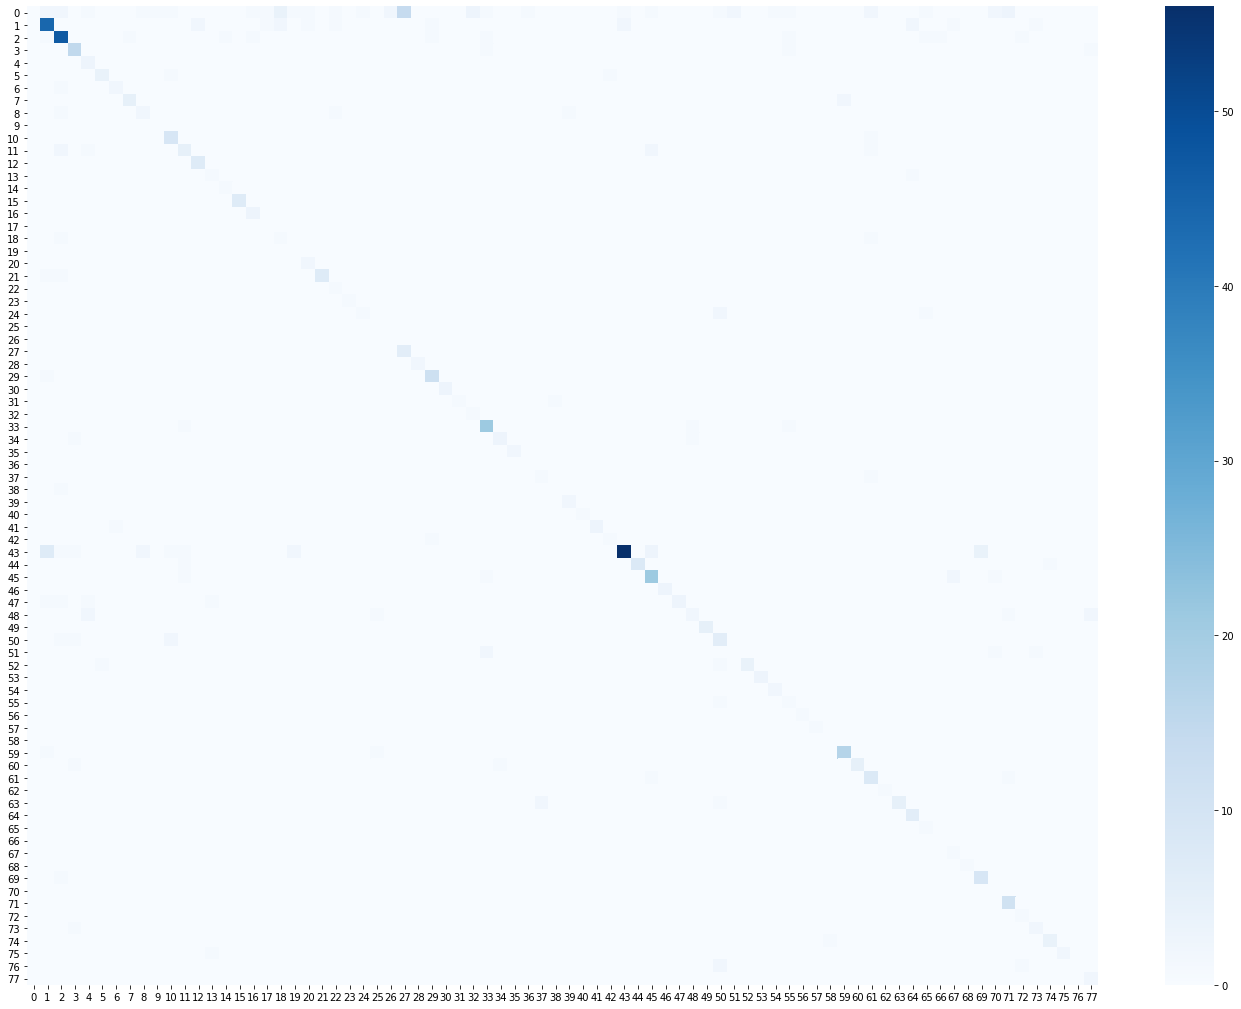

In [18]:
confusion_matrix = confusion_matrix(dados_analise_ml_semnull_approved['True_class'],
                                        dados_analise_ml_semnull_approved['Pred_class'])

fig = plt.figure(figsize=(24, 18))
sns.heatmap(confusion_matrix, cmap='Blues')

#### Accuracy Score

In [19]:
score = accuracy_score(dados_analise_ml_semnull_approved['True_class'],
                       dados_analise_ml_semnull_approved['Pred_class'])

score

0.6983333333333334

#### F1 Score

In [20]:
score = f1_score(dados_analise_ml_semnull_approved['True_class'],
                 dados_analise_ml_semnull_approved['Pred_class'],
                 average='weighted')

score

0.6831017455927221

#### Recall Score

In [21]:
score = recall_score(dados_analise_ml_semnull_approved['True_class'],
                     dados_analise_ml_semnull_approved['Pred_class'],
                     average='weighted')

score

0.6983333333333334

### 3- Crie um classificador que tenha como output se os dados com status igual a revision estão corretos ou não (Sugestão : Técnica de cross-validation K-fold).

In [22]:
#pega somente as linhas onde o status é 'revision'
dados_analise_ml_revision = dados_analise_ml_semnull[dados_analise_ml_semnull['status'] == 'revision'].copy()

dados_analise_ml_revision.head(10)

,Pred_class,probabilidade,status,True_class
600,2,0.752448,revision,2.0
601,24,0.817525,revision,24.0
602,24,0.909148,revision,24.0
603,25,0.509871,revision,25.0
604,25,0.629700,revision,25.0
605,25,0.633426,revision,25.0
606,32,0.621226,revision,32.0
607,55,0.740292,revision,55.0
608,77,0.403734,revision,77.0
609,77,0.419723,revision,77.0


### 4- Compare três métricas de avaliação aplicadas ao modelo e descreva sobre a diferença.

### 5- Crie um classificador, a partir da segunda aba - NLP do arquivo de dados, quepermita identificar qual trecho de música corresponde às respectivas artistas listadas (Sugestão: Naive Bayes Classifier).

In [23]:
#temos 518 dados e duas colunas
#colunas: letra e artista
#letra: trecho da música
#artista: cantora referente ao trecho da música (letra)
dados_nlp.shape

(518, 2)

In [24]:
#verificando se existe linhas com nulo
dados_nlp.describe()

,letra,artista
count,518,518
unique,517,2
top,All along it was a fever A cold sweat hot-head...,Beyoncé
freq,2,274


<AxesSubplot:title={'center':'Análise dos Artistas'}, xlabel='artista', ylabel='count'>

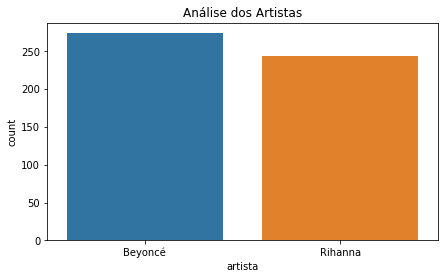

In [25]:
fig = plt.figure(figsize=(7, 4))
plt.title('Análise dos Artistas')
sns.countplot(dados_nlp['artista'])

#Temos dois artistas: Beyoncé e Rihanna
#Beyoncé aparece 274 vezes, aproximadamente 53% 
#Rihanna aparece 244 vezes, aproximadamente 47%

#### Criação do classificador

In [26]:
#separando os dados em X(features) e y(target)

X = dados_nlp['letra']
y = dados_nlp['artista']

#separando os dados para treinamento do classificador e para testá-lo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

#para a extração de features será utilizado o método bags of words
#o que esse método faz é associar um número inteiro para cada palavra
#e depois armazenará a quantidade de vezes que essa palavra apareceu.
#a função CountVectorizer já realiza todo esse processo de pré processamento e 
#tokenização (associar ao número inteiro) das palavras.
cv = CountVectorizer(stop_words='english')

X_train_tratado = cv.fit_transform(X_train)
X_test_tratado = cv.transform(X_test)

naive_bayes = MultinomialNB()

#treinando o classificador
naive_bayes.fit(X_train_tratado, y_train)

#testando o classificador com os dados de teste
pred = naive_bayes.predict(X_test_tratado)
np.mean(pred == y_test)

0.75